Importing Neccessary Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from google.colab import drive

import warnings
warnings.filterwarnings("ignore")

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Read Data

In [ ]:
data = pd.read_csv(r'/content/gdrive/My Drive/Colab Notebooks/HW/2/random_dataset.csv', header=None)

Representing 5 Rows to Gain Insight

In [ ]:
print(data.head(n=5))

            0          1    2
0  104.930063  -0.095869  0.0
1   92.147173  20.464174  0.0
2  104.635422   3.316754  0.0
3   88.635358   5.333426  0.0
4  104.982674   5.092142  0.0


Inverting into Numpy Array and Shuffle

In [ ]:
data = data.sample(frac = 1)
data = data.values

Plotting to Gain Some Insights

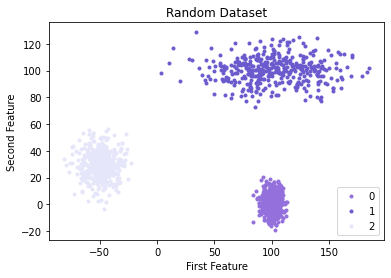

In [ ]:
zerosData = np.array([data[i,0:2] for i in range(len(data)) if data[i,2]==0])
onesData = np.array([data[i,0:2] for i in range(len(data)) if data[i,2]==1])
twosData = np.array([data[i,0:2] for i in range(len(data)) if data[i,2]==2])


plt.scatter(zerosData[:,0], zerosData[:,1],
                marker='.', color='mediumpurple', label=0)
plt.scatter(onesData[:,0], onesData[:,1],
                marker='.', color='slateblue', label=1)
plt.scatter(twosData[:,0], twosData[:,1],
                marker='.', color='lavender', label=2)

plt.title('Random Dataset')
plt.xlabel('First Feature')
plt.ylabel('Second Feature')
plt.legend(loc="lower right")
plt.show()

Separating Features and Labels

In [ ]:
X = data[:,0:2] #Features
y = data[:,2] #Labels

One vs Rest

In [ ]:
def oneVsRest(labels, className):
  newLabels = np.zeros(len(labels),dtype=int)
  
  for label in range(len(labels)):
    newLabels[label]=1 if labels[label]==className else 0
  return newLabels


zeroTragetLabels = oneVsRest(y, 0)
oneTragetLabels = oneVsRest(y, 1)
twoTargetLabels = oneVsRest(y, 2)

Logestic Regression Using Cross Entropy

In [ ]:
class myLogReg():

  def __init__(self, _numOfEpochs, _learningRate):
    self.numOfEpochs = _numOfEpochs
    self.learningRate = _learningRate
    self.cost = []

    print('The classifier is created successfully!')
    [print('*') for i in range(5)]

  def fit(self, _X, _y):
    #Initialization:
    self.X = _X
    self.y = _y
    self.lenData, self.numOfFeatures = self.X.shape

    self.theta = np.zeros(self.numOfFeatures,)
    self.bias = 0

    #Gradient Descent:
    for epoch in range(self.numOfEpochs):
      self.updateWeightsGD()
    
  def updateWeightsGD(self):
    h = 1/(1+np.exp(-(self.X @ self.theta + self.bias)))
    self.theta -= self.learningRate * ((self.X.T)@ (np.reshape(h-self.y.T, self.lenData))) /self.lenData
    self.bias -= self.learningRate * np.sum(np.reshape(h-self.y.T, self.lenData)) / self.lenData
    self.updateCost(h)

  def updateCost(self, h):
    calcCost = -(self.y * np.log(h)  + (1-self.y) * np.log(1-h)) / self.lenData
    self.cost.append(calcCost.sum(axis=0))

  def plotCostFunc(self, className):
    plt.plot(range(self.numOfEpochs), self.cost, color='mediumpurple')
    plt.title('Error of Estimating Label ' + className)
    plt.xlabel('Iterations')
    plt.ylabel('Cost Value')
    plt.show()

  # def predict(self, data):
  #   h = 1/(1+np.exp(-(data @ self.theta + self.bias)))
  #   return np.where(h>0.5, 1, 0)

  def givePredWeigh(self):
    return self.theta, self.bias

The classifier is created successfully!
*
*
*
*
*


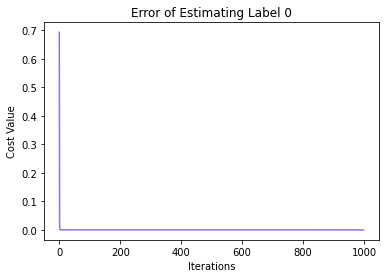

The classifier is created successfully!
*
*
*
*
*


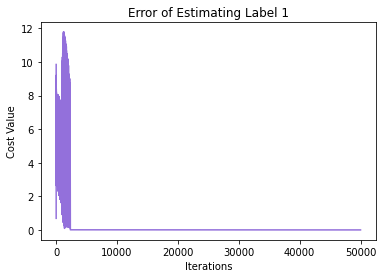

The classifier is created successfully!
*
*
*
*
*


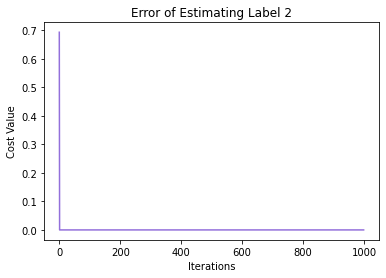

In [ ]:
myLogRegClsf = myLogReg(1000, 0.01)
myLogRegClsf.fit(X, zeroTragetLabels)
myLogRegClsf.plotCostFunc('0')
theta0, bias0 = myLogRegClsf.givePredWeigh()

myLogRegClsf1 = myLogReg(50000, 0.01)
myLogRegClsf1.fit(X, oneTragetLabels)
myLogRegClsf1.plotCostFunc('1')
theta1, bias1 = myLogRegClsf1.givePredWeigh()

myLogRegClsf2 = myLogReg(1000, 0.01)
myLogRegClsf2.fit(X, twoTargetLabels)
myLogRegClsf2.plotCostFunc('2')
theta2, bias2 = myLogRegClsf2.givePredWeigh()


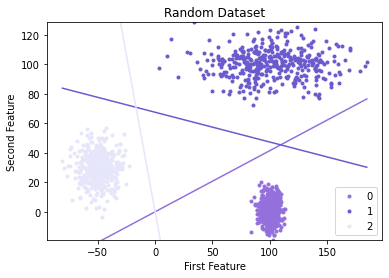

In [ ]:
def plot(data, X, theta0, theta1, theta2, bias0, bias1, bias2):
  zerosData = np.array([data[i,0:2] for i in range(len(data)) if data[i,2]==0])
  onesData = np.array([data[i,0:2] for i in range(len(data)) if data[i,2]==1])
  twosData = np.array([data[i,0:2] for i in range(len(data)) if data[i,2]==2])


  plt.scatter(zerosData[:,0], zerosData[:,1],
                  marker='.', color='mediumpurple', label=0)
  plt.scatter(onesData[:,0], onesData[:,1],
                  marker='.', color='slateblue', label=1)
  plt.scatter(twosData[:,0], twosData[:,1],
                  marker='.', color='lavender', label=2)
  
  x = np.array([min(X[:,0]),max(X[:,0])])
  
  
  plt.plot(x, -(theta0[0] * x + bias0)/theta0[1], color='mediumpurple')
  plt.plot(x, -(theta1[0] * x + bias1)/theta1[1], color='slateblue')
  plt.plot(x, -(theta2[0] * x + bias2)/theta2[1], color='lavender')

  plt.ylim((min(X[:,1]),max(X[:,1])))
  plt.title('Random Dataset')
  plt.xlabel('First Feature')
  plt.ylabel('Second Feature')
  plt.legend(loc="lower right")
  plt.show()

plot(data, X, theta0, theta1, theta2, bias0, bias1, bias2)